In [29]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats # Usaremos para moda, se necessário, e outras funções estatísticas

# Configurações para melhores visualizações
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# 📊 Análise Exploratória de Dados: Universo Pokémon! ⚡⚡

Bem-vindos à nossa jornada de análise de dados no fascinante universo Pokémon! Neste notebook, vamos explorar um conjunto de dados contendo informações sobre diferentes espécies de Pokémon, suas estatísticas de combate, tipos e outras características.

Nosso foco será a **estatística descritiva**. Vamos aprender a:
* Calcular medidas de tendência central (média, mediana, moda).
* Analisar medidas de dispersão (amplitude, variância, desvio padrão, intervalo interquartil).
* Criar e interpretar tabelas de frequência.
* Visualizar distribuições de dados com histogramas e boxplots.
* Investigar correlações entre diferentes atributos dos Pokémon.
* Entender o conceito básico de amostragem.

**Objetivo:** Ao final deste notebook, você será capaz de resumir, descrever e visualizar as principais características de um conjunto de dados, extraindo insights valiosos sobre os Pokémon.

**Dataset:** Utilizaremos o dataset "Pokemon.csv", que contém as seguintes colunas:

* `#`: ID numérico do Pokémon (não usaremos para análise estatística, mas é um identificador).
* `Name`: Nome do Pokémon.
* `Type 1`: Tipo primário do Pokémon (ex: Grass, Fire, Water).
* `Type 2`: Tipo secundário do Pokémon (alguns Pokémon não possuem).
* `HP`: Pontos de Vida (Health Points) - indica a vitalidade do Pokémon.
* `Attack`: Ataque físico - indica o poder de ataques físicos.
* `Defense`: Defesa física - indica a resistência a ataques físicos.
* `Sp. Atk`: Ataque Especial - indica o poder de ataques especiais.
* `Sp. Def`: Defesa Especial - indica a resistência a ataques especiais.
* `Speed`: Velocidade - determina a ordem de ataque em batalhas.
* `Generation`: Geração em que o Pokémon foi introduzido.
* `Legendary`: Booleano (True/False) indicando se o Pokémon é Lendário.

**Nota sobre a coluna `Type 2`:** Esta coluna possui alguns valores ausentes (NaN - Not a Number), pois nem todos os Pokémon têm um segundo tipo. Para simplificar nossa análise descritiva inicial, **não focaremos nesta coluna para cálculos que exijam dados completos em todas as linhas**, mas podemos explorá-la separadamente em contagens, por exemplo. O importante é estar ciente desses dados ausentes!

Vamos começar carregando nossos dados!

In [30]:
# Carregar o dataset
df_pokemon = pd.read_csv('Pokemon.csv')

# Visualizar as primeiras linhas do dataframe
print("Primeiras 5 linhas do dataset:")
df_pokemon.head()

Primeiras 5 linhas do dataset:


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [31]:
# Obter informações gerais sobre o dataframe
print("\nInformações gerais do dataset:")
df_pokemon.info()



Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


## 🚀 Exploração Inicial dos Dados

Acabamos de carregar nosso dataset! A função `head()` nos mostra as primeiras linhas, e `info()` nos dá um resumo das colunas, seus tipos de dados e a quantidade de valores não nulos.

Observamos que:
* Temos 800 Pokémon no nosso dataset.
* A coluna `#` é um identificador numérico.
* `Name`, `Type 1`, `Type 2` são do tipo `object` (strings).
* As colunas de estatísticas (`HP`, `Attack`, etc.), `Generation` são numéricas (`int64`).
* `Legendary` é do tipo `bool` (True/False).
* A coluna `Type 2` tem 386 valores ausentes, como esperado.

Para facilitar algumas análises, podemos renomear colunas com espaços ou caracteres especiais, se houver. No nosso caso, `Sp. Atk` e `Sp. Def` são exemplos.

**Decisão sobre `Type 2`:** Para as análises de estatísticas descritivas numéricas principais, vamos focar nas colunas que não possuem (ou possuem poucos) valores ausentes. Podemos analisar `Type 2` separadamente quando formos ver frequências de tipos.

In [32]:
# Renomear colunas para facilitar o acesso (opcional, mas recomendado)
df_pokemon = df_pokemon.rename(columns={
    '#': 'ID',
    'Type 1': 'Type1',
    'Type 2': 'Type2',
    'HP': 'HP',
    'Attack': 'Attack',
    'Defense': 'Defense',
    'Sp. Atk': 'Sp_Atk',
    'Sp. Def': 'Sp_Def',
    'Speed': 'Speed',
    'Generation': 'Generation',
    'Legendary': 'Legendary'
})

# Confirmar as novas colunas
print("Nomes das colunas após renomear:")
print(df_pokemon.columns)

Nomes das colunas após renomear:
Index(['ID', 'Name', 'Type1', 'Type2', 'HP', 'Attack', 'Defense', 'Sp_Atk',
       'Sp_Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


## 🔢 Estatísticas Descritivas Gerais

Pandas oferece uma função muito útil, `.describe()`, que calcula várias estatísticas descritivas para as colunas numéricas de uma vez!

In [33]:
# Estatísticas descritivas para colunas numéricas
print("Estatísticas descritivas das colunas numéricas:")
df_pokemon.describe()

Estatísticas descritivas das colunas numéricas:


,ID,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [34]:
# Podemos também incluir colunas não numéricas (como 'Type1') para ver contagens e valores únicos
print("\nEstatísticas descritivas incluindo tipos 'object' e 'bool':")
df_pokemon.describe(include=['object', 'bool'])


Estatísticas descritivas incluindo tipos 'object' e 'bool':


,Name,Type1,Type2,Legendary
count,800,800,414,800
unique,800,18,18,2
top,Pumpkaboo Super Size,Water,Flying,False
freq,1,112,97,735


## 🎯 Medidas de Tendência Central

Estas medidas nos dão uma ideia do valor "típico" ou "central" em um conjunto de dados.

* **Média (Mean):** A soma de todos os valores dividida pelo número de valores. Sensível a outliers (valores extremos).
* **Mediana (Median):** O valor do meio quando os dados estão ordenados. Menos sensível a outliers.
* **Moda (Mode):** O valor que aparece com mais frequência. Pode haver mais de uma moda.

In [35]:
# Selecionar colunas de atributos de combate
stats_cols = ['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']

print("Médias dos atributos de combate:")
print(df_pokemon[stats_cols].mean())

print("\nMedianas dos atributos de combate:")
print(df_pokemon[stats_cols].median())

print("\nModas dos atributos de combate (pode haver múltiplas modas por coluna):")
# A função mode() do pandas retorna um DataFrame, pois pode haver múltiplas modas
for col in stats_cols:
    print(f"Moda(s) para {col}: {df_pokemon[col].mode().tolist()}")

print("\nModa para 'Type1':")
print(df_pokemon['Type1'].mode().tolist())

Médias dos atributos de combate:
HP         69.25875
Attack     79.00125
Defense    73.84250
Sp_Atk     72.82000
Sp_Def     71.90250
Speed      68.27750
dtype: float64

Medianas dos atributos de combate:
HP         65.0
Attack     75.0
Defense    70.0
Sp_Atk     65.0
Sp_Def     70.0
Speed      65.0
dtype: float64

Modas dos atributos de combate (pode haver múltiplas modas por coluna):
Moda(s) para HP: [60]
Moda(s) para Attack: [100]
Moda(s) para Defense: [70]
Moda(s) para Sp_Atk: [60]
Moda(s) para Sp_Def: [80]
Moda(s) para Speed: [50]

Moda para 'Type1':
['Water']


## ↔️ Medidas de Dispersão

Estas medidas nos dizem o quão espalhados ou variados os dados estão.

* **Amplitude (Range):** Diferença entre o valor máximo e mínimo.
* **Variância (Variance):** Média dos quadrados das diferenças entre cada valor e a média. Dá uma ideia da dispersão dos dados.
* **Desvio Padrão (Standard Deviation):** Raiz quadrada da variância. É expresso na mesma unidade dos dados originais, facilitando a interpretação.
* **Intervalo Interquartil (IQR - Interquartile Range):** Diferença entre o terceiro quartil (Q3 - 75º percentil) e o primeiro quartil (Q1 - 25º percentil). Mede a dispersão dos 50% centrais dos dados, menos sensível a outliers.

In [36]:
print("Amplitude (Range) dos atributos de combate:")
for col in stats_cols:
    range_val = df_pokemon[col].max() - df_pokemon[col].min()
    print(f"Amplitude para {col}: {range_val} (Min: {df_pokemon[col].min()}, Max: {df_pokemon[col].max()})")

print("\nVariância dos atributos de combate:")
print(df_pokemon[stats_cols].var())

print("\nDesvio Padrão dos atributos de combate:")
print(df_pokemon[stats_cols].std())

print("\nQuartis e Intervalo Interquartil (IQR) para 'Attack':")
Q1_attack = df_pokemon['Attack'].quantile(0.25)
Q3_attack = df_pokemon['Attack'].quantile(0.75)
IQR_attack = Q3_attack - Q1_attack
print(f"Q1 (Attack): {Q1_attack}")
print(f"Q3 (Attack): {Q3_attack}")
print(f"IQR (Attack): {IQR_attack}")

# Podemos calcular para todas as colunas de uma vez
print("\nIQRs para todos os atributos de combate:")
Q1 = df_pokemon[stats_cols].quantile(0.25)
Q3 = df_pokemon[stats_cols].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Amplitude (Range) dos atributos de combate:
Amplitude para HP: 254 (Min: 1, Max: 255)
Amplitude para Attack: 185 (Min: 5, Max: 190)
Amplitude para Defense: 225 (Min: 5, Max: 230)
Amplitude para Sp_Atk: 184 (Min: 10, Max: 194)
Amplitude para Sp_Def: 210 (Min: 20, Max: 230)
Amplitude para Speed: 175 (Min: 5, Max: 180)

Variância dos atributos de combate:
HP          652.019323
Attack     1053.480599
Defense     972.410707
Sp_Atk     1070.748536
Sp_Def      774.448554
Speed       844.511133
dtype: float64

Desvio Padrão dos atributos de combate:
HP         25.534669
Attack     32.457366
Defense    31.183501
Sp_Atk     32.722294
Sp_Def     27.828916
Speed      29.060474
dtype: float64

Quartis e Intervalo Interquartil (IQR) para 'Attack':
Q1 (Attack): 55.0
Q3 (Attack): 100.0
IQR (Attack): 45.0

IQRs para todos os atributos de combate:
HP         30.00
Attack     45.00
Defense    40.00
Sp_Atk     45.25
Sp_Def     40.00
Speed      45.00
dtype: float64


## 📊 Visualizando Distribuições

Gráficos são essenciais para entender a forma da distribuição dos dados.

* **Histograma:** Mostra a frequência de valores dentro de intervalos (bins). Ajuda a ver a forma da distribuição (simétrica, assimétrica, etc.).
* **Boxplot (Diagrama de Caixa):** Exibe a mediana, os quartis (Q1, Q3), o IQR e possíveis outliers. Ótimo para comparar distribuições entre grupos.

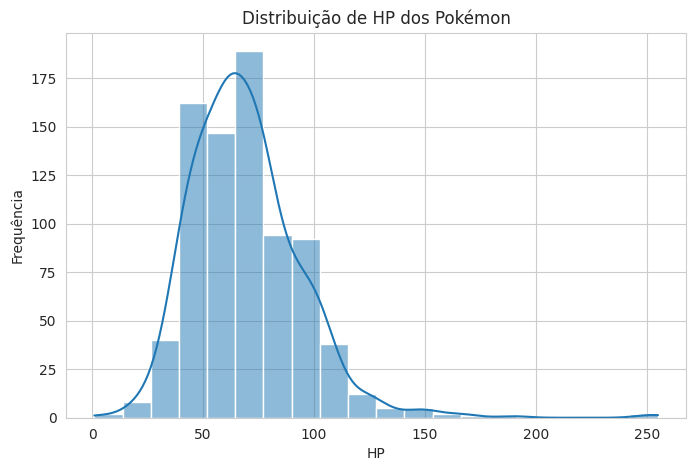

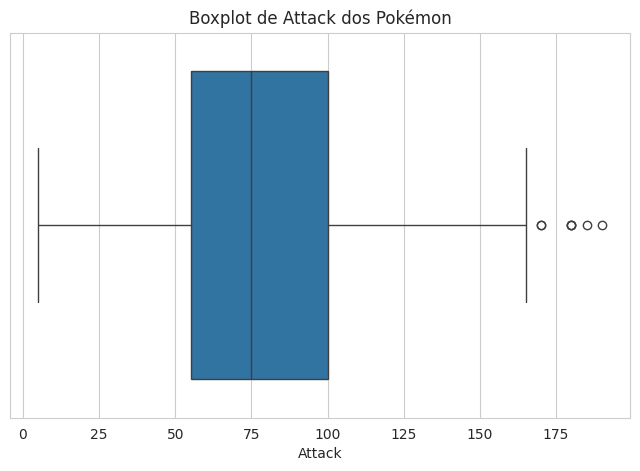

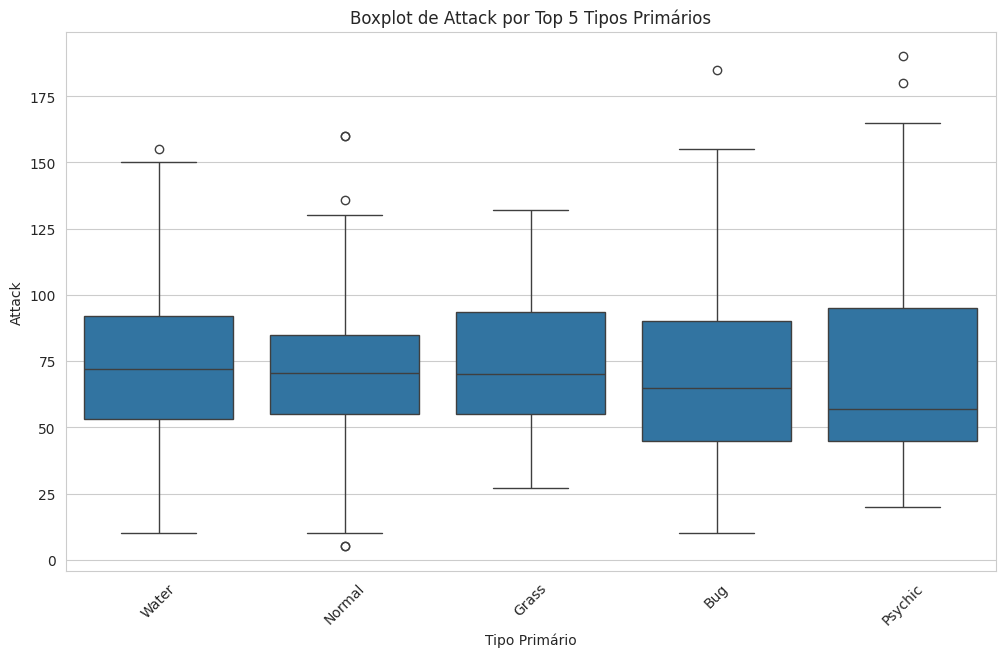

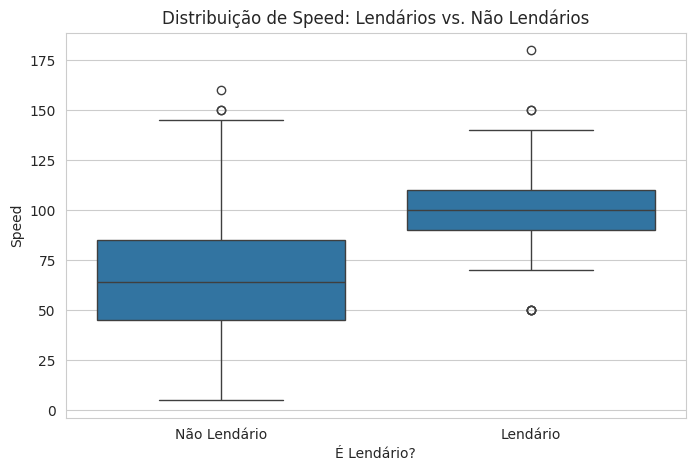

In [37]:
# Histograma para o atributo 'HP'
plt.figure(figsize=(8,5))
sns.histplot(df_pokemon['HP'], kde=True, bins=20) # kde=True adiciona uma estimativa da densidade do kernel
plt.title('Distribuição de HP dos Pokémon')
plt.xlabel('HP')
plt.ylabel('Frequência')
plt.show()

# Boxplot para o atributo 'Attack'
plt.figure(figsize=(8,5))
sns.boxplot(x=df_pokemon['Attack'])
plt.title('Boxplot de Attack dos Pokémon')
plt.xlabel('Attack')
plt.show()

# Boxplots comparando 'Attack' por 'Type1' (apenas alguns tipos para melhor visualização)
# Primeiro, vamos ver os tipos mais comuns para selecionar alguns
top_types = df_pokemon['Type1'].value_counts().nlargest(5).index
df_top_types = df_pokemon[df_pokemon['Type1'].isin(top_types)]

plt.figure(figsize=(12,7))
sns.boxplot(x='Type1', y='Attack', data=df_top_types, order=top_types)
plt.title('Boxplot de Attack por Top 5 Tipos Primários')
plt.xlabel('Tipo Primário')
plt.ylabel('Attack')
plt.xticks(rotation=45)
plt.show()

# Boxplot comparando 'Speed' entre Pokémon Lendários e Não Lendários
plt.figure(figsize=(8,5))
sns.boxplot(x='Legendary', y='Speed', data=df_pokemon)
plt.title('Distribuição de Speed: Lendários vs. Não Lendários')
plt.xlabel('É Lendário?')
plt.ylabel('Speed')
plt.xticks([0, 1], ['Não Lendário', 'Lendário']) # Melhora os rótulos do eixo x
plt.show()

## 📜 Tabelas de Frequência

Tabelas de frequência mostram quantas vezes cada valor (ou categoria) aparece em um conjunto de dados. São muito úteis para variáveis categóricas.

Podemos também criar tabelas de frequência para variáveis numéricas "discretizando-as", ou seja, agrupando valores em classes ou intervalos.

Tabela de Frequência para 'Type1':
Type1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64

Tabela de Frequência Relativa para 'Type1':
Type1
Water       14.000
Normal      12.250
Grass        8.750
Bug          8.625
Psychic      7.125
Fire         6.500
Rock         5.500
Electric     5.500
Ground       4.000
Ghost        4.000
Dragon       4.000
Dark         3.875
Poison       3.500
Fighting     3.375
Steel        3.375
Ice          3.000
Fairy        2.125
Flying       0.500
Name: proportion, dtype: float64


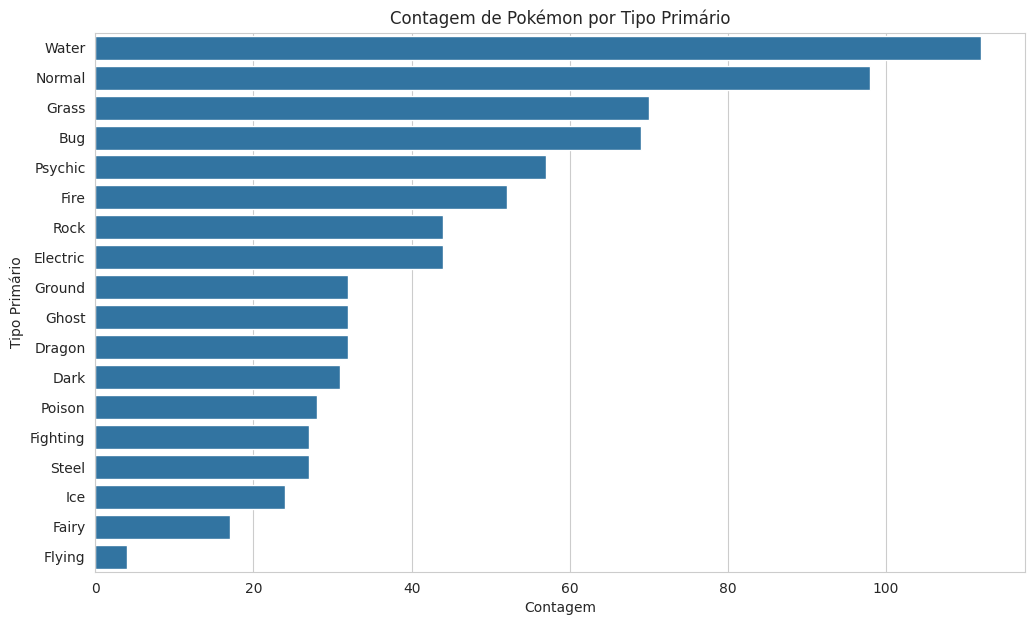


Tabela de Frequência para 'Generation':
Generation
1    166
2    106
3    160
4    121
5    165
6     82
Name: count, dtype: int64

Tabela de Frequência para Classes de HP:
HP_Class
0-40        50
41-80      514
81-120     209
121-160     21
>160         6
Name: count, dtype: int64


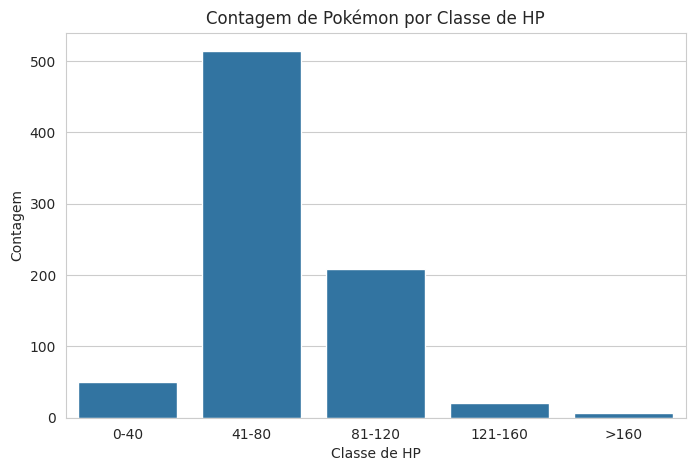

In [38]:
# Tabela de frequência para 'Type1'
print("Tabela de Frequência para 'Type1':")
freq_type1 = df_pokemon['Type1'].value_counts()
print(freq_type1)

# Tabela de frequência relativa (porcentagem) para 'Type1'
print("\nTabela de Frequência Relativa para 'Type1':")
freq_rel_type1 = df_pokemon['Type1'].value_counts(normalize=True) * 100
print(freq_rel_type1)

# Visualizar com um gráfico de barras
plt.figure(figsize=(12,7))
sns.countplot(y='Type1', data=df_pokemon, order=df_pokemon['Type1'].value_counts().index)
plt.title('Contagem de Pokémon por Tipo Primário')
plt.xlabel('Contagem')
plt.ylabel('Tipo Primário')
plt.show()

# Tabela de frequência para 'Generation'
print("\nTabela de Frequência para 'Generation':")
freq_generation = df_pokemon['Generation'].value_counts().sort_index() # sort_index para ordenar pela geração
print(freq_generation)

# Criando classes para o atributo 'HP'
# Definir os limites dos intervalos (bins)
# Ex: 0-40, 41-80, 81-120, 121-160, >160
bins_hp = [0, 40, 80, 120, 160, df_pokemon['HP'].max() + 1] # +1 para incluir o valor máximo
labels_hp = ['0-40', '41-80', '81-120', '121-160', '>160']

# Criar uma nova coluna com as classes de HP
df_pokemon['HP_Class'] = pd.cut(df_pokemon['HP'], bins=bins_hp, labels=labels_hp, right=False) # right=False significa [inicio, fim)

print("\nTabela de Frequência para Classes de HP:")
freq_hp_class = df_pokemon['HP_Class'].value_counts().sort_index()
print(freq_hp_class)

# Visualizar classes de HP
plt.figure(figsize=(8,5))
sns.countplot(x='HP_Class', data=df_pokemon, order=labels_hp)
plt.title('Contagem de Pokémon por Classe de HP')
plt.xlabel('Classe de HP')
plt.ylabel('Contagem')
plt.show()

## 🔗 Correlação entre Variáveis

Correlação mede a força e a direção da relação linear entre duas variáveis numéricas. O coeficiente de correlação de Pearson varia de -1 a +1:
* **+1:** Correlação linear positiva perfeita.
* **-1:** Correlação linear negativa perfeita.
* **0:** Nenhuma correlação linear.

**Importante:** Correlação não implica causalidade!

Usaremos gráficos de dispersão (scatter plots) para visualizar a relação entre duas variáveis e uma matriz de correlação para ver as correlações entre várias variáveis de uma vez.

Matriz de Correlação:
                  HP    Attack   Defense    Sp_Atk    Sp_Def     Speed  \
HP          1.000000  0.422386  0.239622  0.362380  0.378718  0.175952   
Attack      0.422386  1.000000  0.438687  0.396362  0.263990  0.381240   
Defense     0.239622  0.438687  1.000000  0.223549  0.510747  0.015227   
Sp_Atk      0.362380  0.396362  0.223549  1.000000  0.506121  0.473018   
Sp_Def      0.378718  0.263990  0.510747  0.506121  1.000000  0.259133   
Speed       0.175952  0.381240  0.015227  0.473018  0.259133  1.000000   
Generation  0.058683  0.051451  0.042419  0.036437  0.028486 -0.023121   

            Generation  
HP            0.058683  
Attack        0.051451  
Defense       0.042419  
Sp_Atk        0.036437  
Sp_Def        0.028486  
Speed        -0.023121  
Generation    1.000000  


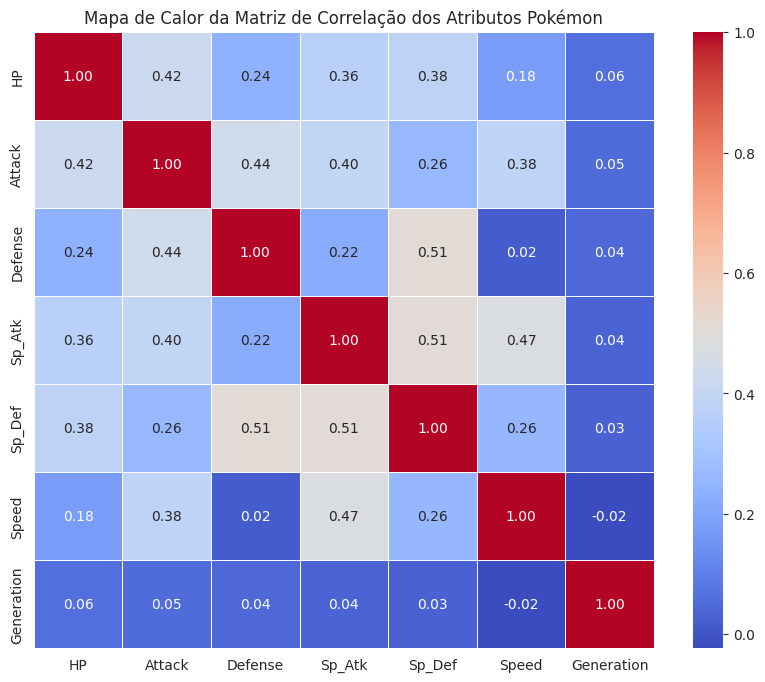

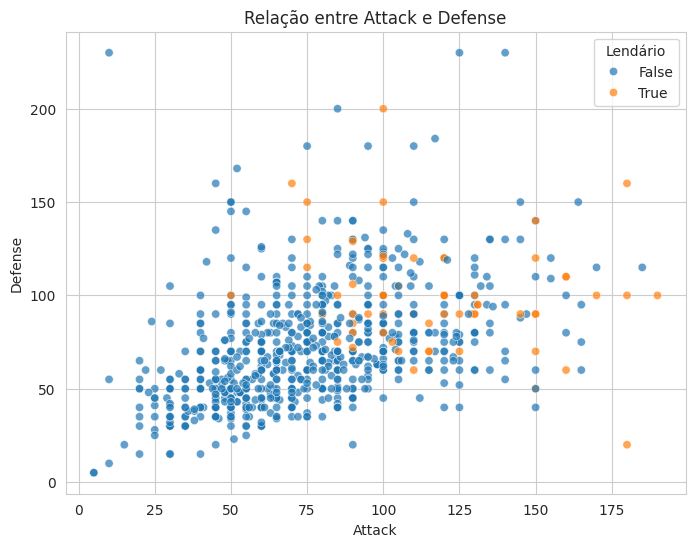

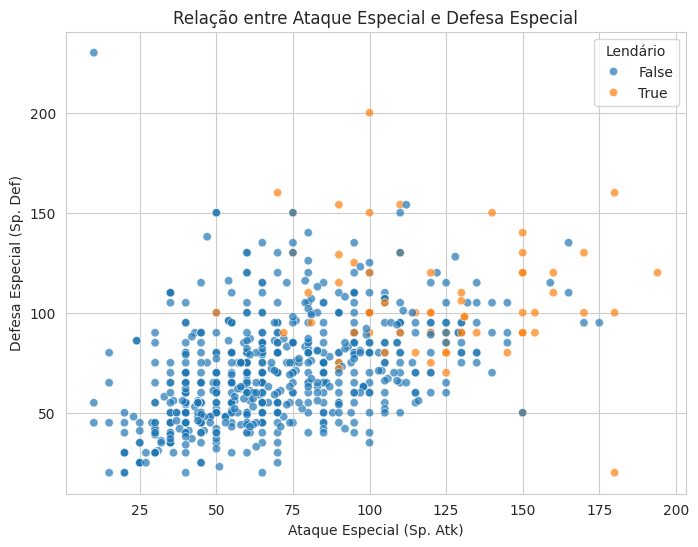

In [39]:
# Selecionar apenas colunas numéricas para a matriz de correlação
numerical_cols = df_pokemon.select_dtypes(include=np.number).columns.tolist()
# Remover 'ID' e 'Generation' se não quisermos correlacioná-los com atributos de combate de forma primária,
# ou deixar 'Generation' para ver se há alguma tendência. Vamos remover 'ID'.
numerical_cols.remove('ID')
# A coluna Legendary é booleana, mas o pandas a trata como 0 e 1, então pode ser incluída.

# Calcular a matriz de correlação
correlation_matrix = df_pokemon[numerical_cols].corr()

print("Matriz de Correlação:")
print(correlation_matrix)

# Visualizar a matriz de correlação com um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor da Matriz de Correlação dos Atributos Pokémon')
plt.show()

# Gráfico de dispersão (Scatter Plot) entre 'Attack' e 'Defense'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Attack', y='Defense', data=df_pokemon, hue='Legendary', alpha=0.7) # hue para colorir por Lendário
plt.title('Relação entre Attack e Defense')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.legend(title='Lendário')
plt.show()

# Gráfico de dispersão (Scatter Plot) entre 'Sp_Atk' e 'Sp_Def'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sp_Atk', y='Sp_Def', data=df_pokemon, hue='Legendary', alpha=0.7)
plt.title('Relação entre Ataque Especial e Defesa Especial')
plt.xlabel('Ataque Especial (Sp. Atk)')
plt.ylabel('Defesa Especial (Sp. Def)')
plt.legend(title='Lendário')
plt.show()

## 🎲 Amostragem (Uma Breve Introdução)

Em muitos cenários do mundo real, não temos acesso a toda a "população" de dados. Em vez disso, trabalhamos com uma **amostra** – um subconjunto representativo da população.

A estatística descritiva pode ser aplicada tanto à população completa (como estamos fazendo aqui com todos os 800 Pokémon do nosso dataset) quanto a amostras.

Vamos ver como tirar uma amostra aleatória simples dos nossos Pokémon e comparar algumas de suas estatísticas com as da população total.

In [40]:
# Definir o tamanho da amostra
tamanho_amostra = 50

# Tirar uma amostra aleatória simples sem reposição
# random_state é para garantir reprodutibilidade, para que todos obtenham a mesma amostra
amostra_pokemon = df_pokemon.sample(n=tamanho_amostra, random_state=42)

print(f"Primeiras 5 linhas da amostra de {tamanho_amostra} Pokémon:")
print(amostra_pokemon.head())

print(f"\nInformações da amostra:")
amostra_pokemon.info()

# Comparar a média de 'Attack' da população e da amostra
media_attack_populacao = df_pokemon['Attack'].mean()
media_attack_amostra = amostra_pokemon['Attack'].mean()

print(f"\nMédia de Attack (População Total): {media_attack_populacao:.2f}")
print(f"Média de Attack (Amostra de {tamanho_amostra}): {media_attack_amostra:.2f}")

# Comparar a mediana de 'HP' da população e da amostra
mediana_hp_populacao = df_pokemon['HP'].median()
mediana_hp_amostra = amostra_pokemon['HP'].median()

print(f"\nMediana de HP (População Total): {mediana_hp_populacao:.2f}")
print(f"Mediana de HP (Amostra de {tamanho_amostra}): {mediana_hp_amostra:.2f}")

# Comparar a contagem de Pokémon Lendários na população e na amostra (em proporção)
prop_lendarios_populacao = df_pokemon['Legendary'].value_counts(normalize=True).get(True, 0) * 100
prop_lendarios_amostra = amostra_pokemon['Legendary'].value_counts(normalize=True).get(True, 0) * 100

print(f"\nProporção de Lendários (População Total): {prop_lendarios_populacao:.2f}%")
print(f"Proporção de Lendários (Amostra de {tamanho_amostra}): {prop_lendarios_amostra:.2f}%")

Primeiras 5 linhas da amostra de 50 Pokémon:
      ID        Name     Type1   Type2  HP  Attack  Defense  Sp_Atk  Sp_Def  \
696  697   Hydreigon      Dark  Dragon  92     105       90     125      90   
667  668    Beheeyem   Psychic     NaN  75      75       75     125      95   
63    64   Growlithe      Fire     NaN  55      70       45      70      50   
533  534  Wash Rotom  Electric   Water  50      65      107     105     107   
66    67   Poliwhirl     Water     NaN  65      65       65      50      50   

     Speed  Generation  Legendary HP_Class  
696     98           5      False   81-120  
667     40           5      False    41-80  
63      60           1      False    41-80  
533     86           4      False    41-80  
66      90           1      False    41-80  

Informações da amostra:
<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 696 to 534
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   


# ATV1 - Questões para Reflexão e Análise

Agora é a sua vez de explorar e pensar sobre os dados! Responda às seguintes perguntas com base nas análises que fizemos e em novas explorações que você pode realizar. Não se limite a números; interprete os resultados!

1.  **Tendência Central dos Atributos:**
    * Qual atributo de combate (`HP`, `Attack`, `Defense`, `Sp_Atk`, `Sp_Def`, `Speed`) possui a maior média? E a maior mediana?
    * Se a média e a mediana de um atributo são muito diferentes, o que isso pode indicar sobre a distribuição desse atributo? (Dica: pense em outliers ou assimetria).

2.  **Dispersão dos Atributos:**
    * Qual atributo de combate apresenta a maior variabilidade (maior desvio padrão)? O que isso significa na prática para os Pokémon?
    * Olhando para o boxplot de `Speed` comparando Lendários e Não Lendários, qual grupo parece ter uma `Speed` mais consistente (menor dispersão)?

3.  **Tipos de Pokémon:**
    * Qual é o tipo primário (`Type1`) mais comum de Pokémon? E o menos comum?
    * Crie um gráfico de barras para a frequência de `Type2`. Lembre-se de como lidar com os valores ausentes para esta visualização (eles podem ser uma categoria "Nenhum" ou serem ignorados na contagem, dependendo do seu objetivo). O que você observa?

4.  **Distribuições:**
    * Observe o histograma de `HP`. A distribuição parece ser simétrica, assimétrica à direita (cauda longa para valores altos) ou assimétrica à esquerda (cauda longa para valores baixos)?
    * Compare os boxplots de `Attack` para os 5 tipos primários mais comuns. Existe algum tipo que se destaca por ter valores de `Attack` consistentemente mais altos ou mais baixos?

5.  **Correlações:**
    * Qual é a correlação mais forte (positiva ou negativa, ignorando o sinal por um momento) que você observou entre os atributos de combate na matriz de correlação? Interprete essa correlação. (Ex: Se `Attack` e `Defense` têm correlação positiva, o que isso sugere?)
    * Existe alguma correlação forte entre `Speed` e os atributos de ataque (`Attack`, `Sp_Atk`)? O que isso poderia significar em termos de estratégia de batalha Pokémon?
    * Observe o gráfico de dispersão entre `Attack` e `Defense`. A relação parece ser estritamente linear? Há muitos Pokémon que fogem da tendência geral?

6.  **Pokémon Lendários:**
    * Em geral, os Pokémon Lendários tendem a ter estatísticas de combate mais altas do que os não Lendários? Use as médias ou medianas dos atributos de combate, separando por `Legendary`, para embasar sua resposta. (Dica: você pode usar `df_pokemon.groupby('Legendary')[stats_cols].mean()`).
    * Observando os boxplots que construímos, os Pokémon Lendários parecem ter uma maior variabilidade em algum atributo específico em comparação com os não Lendários, ou são consistentemente altos em todos?

7.  **Gerações:**
    * Calcule a média de `HP`, `Attack` e `Defense` para cada `Generation`. Há alguma tendência perceptível no "poder" médio dos Pokémon ao longo das gerações?
    * Qual geração introduziu o maior número de Pokémon?

8.  **Amostragem:**
    * Ao comparar as estatísticas da amostra com as da população total, quão próximas elas ficaram?
    * Se você tirasse uma amostra muito pequena (ex: 5 Pokémon), você esperaria que as estatísticas da amostra fossem mais ou menos representativas da população total em comparação com a amostra de 50 Pokémon? Por quê?

9.  **Exploração Livre (HP por Classes):**
    * Analisando a tabela de frequência das classes de `HP` que criamos, qual classe de `HP` é a mais comum?
    * Os Pokémon Lendários estão mais concentrados em classes de `HP` mais altas? (Dica: filtre o DataFrame para Lendários e depois veja a distribuição de `HP_Class`).

10. **Conclusão Pessoal e Insight:**
    * Qual foi a descoberta mais interessante ou surpreendente que você fez ao analisar este universo de Pokémon? Descreva-a e explique por que chamou sua atenção.

### 1.  **Tendência Central dos Atributos:**
* Qual atributo de combate (`HP`, `Attack`, `Defense`, `Sp_Atk`, `Sp_Def`, `Speed`) possui a maior média? E a maior mediana?
    Maior média é Attack, com valor médio de 79,00.

* Se a média e a mediana de um atributo são muito diferentes, o que isso pode indicar sobre a distribuição desse atributo? (Dica: pense em outliers ou assimetria).

    Maior mediana também é Attack, com valor mediano de 75.

Portanto, **Attack** é o atributo centralmente mais elevado tanto em média quanto em mediana entre os Pokémon do dataset. 

In [41]:
df_pokemon[stats_cols].agg(['mean', 'median', lambda x: x.mode().iloc[0]])

,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed
mean,69.25875,79.00125,73.8425,72.82,71.9025,68.2775
median,65.00000,75.00000,70.0000,65.00,70.0000,65.0000
<lambda>,60.00000,100.00000,70.0000,60.00,80.0000,50.0000


### 2. **Dispersão dos Atributos:**
* Qual atributo de combate apresenta a maior variabilidade (maior desvio padrão)? O que isso significa na prática para os Pokémon?

    O atributo de combate com maior variabilidade (maior desvio padrão) é o Sp. Atk (Ataque Especial), com desvio padrão de aproximadamente 32,72.

    Significa que o Ataque Especial dos Pokémon varia bastante entre diferentes espécies. Alguns Pokémon têm Sp. Atk muito baixo (por exemplo, os mais defensivos ou físicos), enquanto outros (como Pokémon do tipo Psíquico ou Lendários) possuem Sp. Atk muito elevado.

    Essa alta variabilidade indica que:Sp. Atk é uma característica altamente diferenciadora entre os Pokémon;

* Olhando para o boxplot de `Speed` comparando Lendários e Não Lendários, qual grupo parece ter uma `Speed` mais consistente (menor dispersão)?
    
    Os Pokémon Lendários apresentam uma dispersão menor (boxplot mais compacto), indicando que sua Speed é mais consistente entre os diferentes indivíduos do grupo. tendendo a ter velocidades mais altas e homogêneas, o que reflete seu perfil mais equilibrado e poderoso nas batalhas.Já os Não Lendários têm uma variabilidade maior em Speed, com mais outliers e uma faixa interquartil mais ampla.

In [42]:
df_pokemon[stats_cols].agg(['min', 'max', 'std', 'var', lambda x: x.quantile(0.75) - x.quantile(0.25)])


,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
var,652.019323,1053.480599,972.410707,1070.748536,774.448554,844.511133
<lambda>,30.000000,45.000000,40.000000,45.250000,40.000000,45.000000


### 3 **Tipos de Pokémon:**
* Qual é o tipo primário (`Type1`) mais comum de Pokémon? E o menos comum?

    O tipo primário mais comum entre os Pokémon é Water (Água), com 112 ocorrências e o  menos comum é Flying (Voador), com apenas 4 ocorrências.

In [43]:
bins = [0, 50, 70, 90, 110, 130, 255]
labels = ['Muito Baixo', 'Baixo', 'Médio', 'Alto', 'Muito Alto', 'Extremo']
df_pokemon['HP_Class'] = pd.cut(df_pokemon['HP'], bins=bins, labels=labels, right=False)
df_pokemon['HP_Class'].value_counts().sort_index()

HP_Class
Muito Baixo    148
Baixo          274
Médio          220
Alto           116
Muito Alto      26
Extremo         15
Name: count, dtype: int64

* Crie um gráfico de barras para a frequência de `Type2`. Lembre-se de como lidar com os valores ausentes para esta visualização (eles podem ser uma categoria "Nenhum" ou serem ignorados na contagem, dependendo do seu objetivo). O que você observa?

    A categoria "Nenhum" é de longe a mais frequente, indicando que muitos Pokémon não possuem um segundo tipo,já os que têm um segundo tipo, os mais comuns são Flying, Poison, Ground e Psychic.

    O segundo tipo é um atributo opcional e menos distribuído do que o tipo primário. Muitos Pokémon têm uma tipagem simples, e os tipos mais versáteis ou complementares (como Flying e Poison) tendem a aparecer com mais frequência como Type 2

/tmp/ipykernel_8456/1523948218.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type2_counts.index, y=type2_counts.values, palette="viridis")


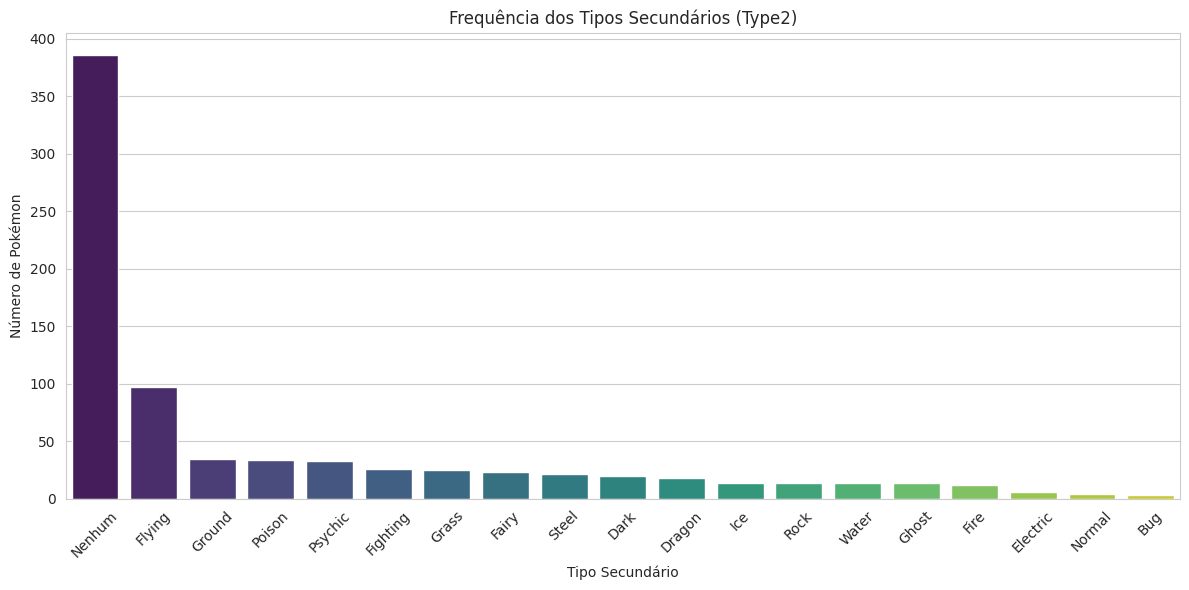

In [44]:
df_pokemon['Type2'] = df_pokemon['Type2'].fillna('Nenhum')

# Contar frequência de cada tipo secundário
type2_counts = df_pokemon['Type2'].value_counts().sort_values(ascending=False)

# Criar gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=type2_counts.index, y=type2_counts.values, palette="viridis")
plt.title('Frequência dos Tipos Secundários (Type2)')
plt.ylabel('Número de Pokémon')
plt.xlabel('Tipo Secundário')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 4 **Distribuições:**
* Observe o histograma de `HP`. A distribuição parece ser simétrica, assimétrica à direita (cauda longa para valores altos) ou assimétrica à esquerda (cauda longa para valores baixos)?

    Observando o histograma de HP, vemos que a distribuição é ligeiramente assimétrica à direita — ou seja, há uma cauda mais longa para os valores altos de HP.
    * A maioria dos Pokémon tem valores de HP entre 40 e 90.
    * Há alguns poucos Pokémon com HP muito alto (acima de 150), que puxam a cauda da distribuição para a direita.
    * Essa assimetria sugere a presença de outliers com HP elevado, como alguns Lendários ou Pokémon específicos de defesa/tanque.

* Compare os boxplots de `Attack` para os 5 tipos primários mais comuns. Existe algum tipo que se destaca por ter valores de `Attack` consistentemente mais altos ou mais baixos?

    Ao analisar os boxplots de Attack para os cinco tipos primários mais comuns (Water, Normal, Grass, Bug e Psychic), é possível observar que os tipos Psychic e Grass apresentam valores medianos de ataque mais baixos em comparação com os demais. O tipo Normal exibe uma grande variabilidade nos valores de Attack, com presença significativa de outliers, indicando que há Pokémon tanto com ataques muito fracos quanto muito fortes dentro desse tipo. O tipo Bug também apresenta valores de ataque relativamente baixos e mais consistentes, com uma distribuição mais concentrada. Nenhum dos cinco tipos se destaca por ter valores de Attack consistentemente altos, sugerindo que esses tipos tendem a ser mais equilibrados ou especializados em outras características, como velocidade, defesa ou ataque especial.



### 5  **Correlações:**
* Qual é a correlação mais forte (positiva ou negativa, ignorando o sinal por um momento) que você observou entre os atributos de combate na matriz de correlação? Interprete essa correlação. (Ex: Se `Attack` e `Defense` têm correlação positiva, o que isso sugere?)

    A correlação mais forte entre os atributos de combate (ignorando o sinal e a autocorrelação) ocorre entre Defense e Sp. Def, com um coeficiente de aproximadamente 0,51.Essa correlação positiva sugere que, em geral, Pokémon com alta defesa física também tendem a ter boa defesa especial. Ou seja, é comum que um Pokémon seja construído para ser resistente de forma geral, e não apenas em um único tipo de defesa. Isso pode indicar uma tendência de equilíbrio defensivo em Pokémon mais voltados à resistência. 

* Existe alguma correlação forte entre `Speed` e os atributos de ataque (`Attack`, `Sp_Atk`)? O que isso poderia significar em termos de estratégia de batalha Pokémon?

    A correlação entre Speed e os atributos de ataque não é muito forte, mas mostra uma tendência moderada. A correlação com Attack é de aproximadamente 0,38, enquanto com Sp. Atk é um pouco maior, em torno de 0,47. Isso indica que, de forma geral, Pokémon mais rápidos tendem a ter também um bom ataque especial, mais do que ataque físico. Em termos de estratégia de batalha, isso sugere que Pokémon rápidos podem ser vantajosos para estratégias ofensivas, especialmente quando combinam velocidade com ataque especial elevado, já que têm maior chance de atacar antes e causar dano significativo. No entanto, como as correlações não são altas, muitos Pokémon rápidos podem desempenhar papéis diferentes, como suporte ou controle, usando a velocidade para aplicar efeitos de status ou habilidades táticas antes que o oponente possa reagir.

* Observe o gráfico de dispersão entre `Attack` e `Defense`. A relação parece ser estritamente linear? Há muitos Pokémon que fogem da tendência geral?

    O gráfico de dispersão entre Attack e Defense mostra que a relação entre esses dois atributos não é estritamente linear. A maioria dos Pokémon está concentrada em uma faixa intermediária, com valores de ataque e defesa entre 50 e 100, mas há bastante dispersão ao redor dessa faixa.
    Também é possível observar que há muitos Pokémon que fogem da tendência geral — por exemplo, alguns com ataque muito alto e defesa baixa (típicos ofensivos), ou o oposto, com defesa alta e ataque baixo (mais defensivos). Os Pokémon lendários, destacados em vermelho, costumam se distribuir nos extremos superiores dos dois eixos, indicando valores elevados tanto de ataque quanto de defesa, mas ainda assim com variações. Portanto, não existe uma correlação forte ou padrão linear evidente entre Attack e Defense, e a diversidade de perfis de combate é um reflexo da variedade de estratégias e papéis dos Pokémon no jogo.

### 6 **Pokémon Lendários:**
* Em geral, os Pokémon Lendários tendem a ter estatísticas de combate mais altas do que os não Lendários? Use as médias ou medianas dos atributos de combate, separando por `Legendary`, para embasar sua resposta. (Dica: você pode usar `df_pokemon.groupby('Legendary')[stats_cols].mean()`).

    Sim, os Pokémon Lendários tendem a ter **estatísticas de combate significativamente mais altas** do que os não Lendários. Ao comparar as médias, vemos que os Lendários possuem valores muito superiores em todos os atributos — por exemplo, têm em média 116,7 de Attack e 122,2 de Sp. Atk, enquanto os não Lendários têm 75,7 e 68,5, respectivamente. As medianas confirmam esse padrão, com os Lendários mantendo mediana de 110 em Attack e 120 em Sp. Atk, contra 72 e 65 nos não Lendários. Isso mostra que os Lendários são projetados para serem muito mais poderosos de forma geral.

* Observando os boxplots que construímos, os Pokémon Lendários parecem ter uma maior variabilidade em algum atributo específico em comparação com os não Lendários, ou são consistentemente altos em todos?

    Observando os boxplots construídos, os Pokémon Lendários se mostram consistentemente altos em todos os atributos de combate, com medianas superiores e intervalos interquartis elevados quando comparados aos não Lendários. No entanto, a variabilidade interna (dispersão) entre os Lendários costuma ser menor ou semelhante à dos não Lendários, indicando que eles não apenas são mais fortes, mas também mais equilibrados. Isso sugere que os Lendários são projetados para ter alto desempenho de forma estável e uniforme, ao contrário dos não Lendários, que apresentam maior diversidade de papéis — alguns muito ofensivos, outros muito defensivos ou velozes, mas raramente bons em tudo.


In [45]:
df_pokemon.groupby('Legendary')[stats_cols].mean()
df_pokemon.groupby('Legendary')[stats_cols].std()


,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed
Legendary,,,,,,
False,24.808849,30.490153,30.408194,29.091705,25.669310,27.843038
True,21.722164,30.348037,28.255131,31.104608,28.827004,22.952323


Médias por grupo Legendary:
                  HP      Attack    Defense      Sp_Atk      Sp_Def  \
Legendary                                                             
False      67.182313   75.669388  71.559184   68.454422   68.892517   
True       92.738462  116.676923  99.661538  122.184615  105.938462   

                Speed  
Legendary              
False       65.455782  
True       100.184615  

Medianas por grupo Legendary:
             HP  Attack  Defense  Sp_Atk  Sp_Def  Speed
Legendary                                              
False      65.0    72.0     66.0    65.0    65.0   64.0
True       91.0   110.0    100.0   120.0   100.0  100.0


/tmp/ipykernel_8456/1746503973.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_pokemon, x='Legendary', y=attr, palette='Set2')
/tmp/ipykernel_8456/1746503973.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_pokemon, x='Legendary', y=attr, palette='Set2')
/tmp/ipykernel_8456/1746503973.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_pokemon, x='Legendary', y=attr, palette='Set2')
/tmp/ipykernel_8456/1746503973.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

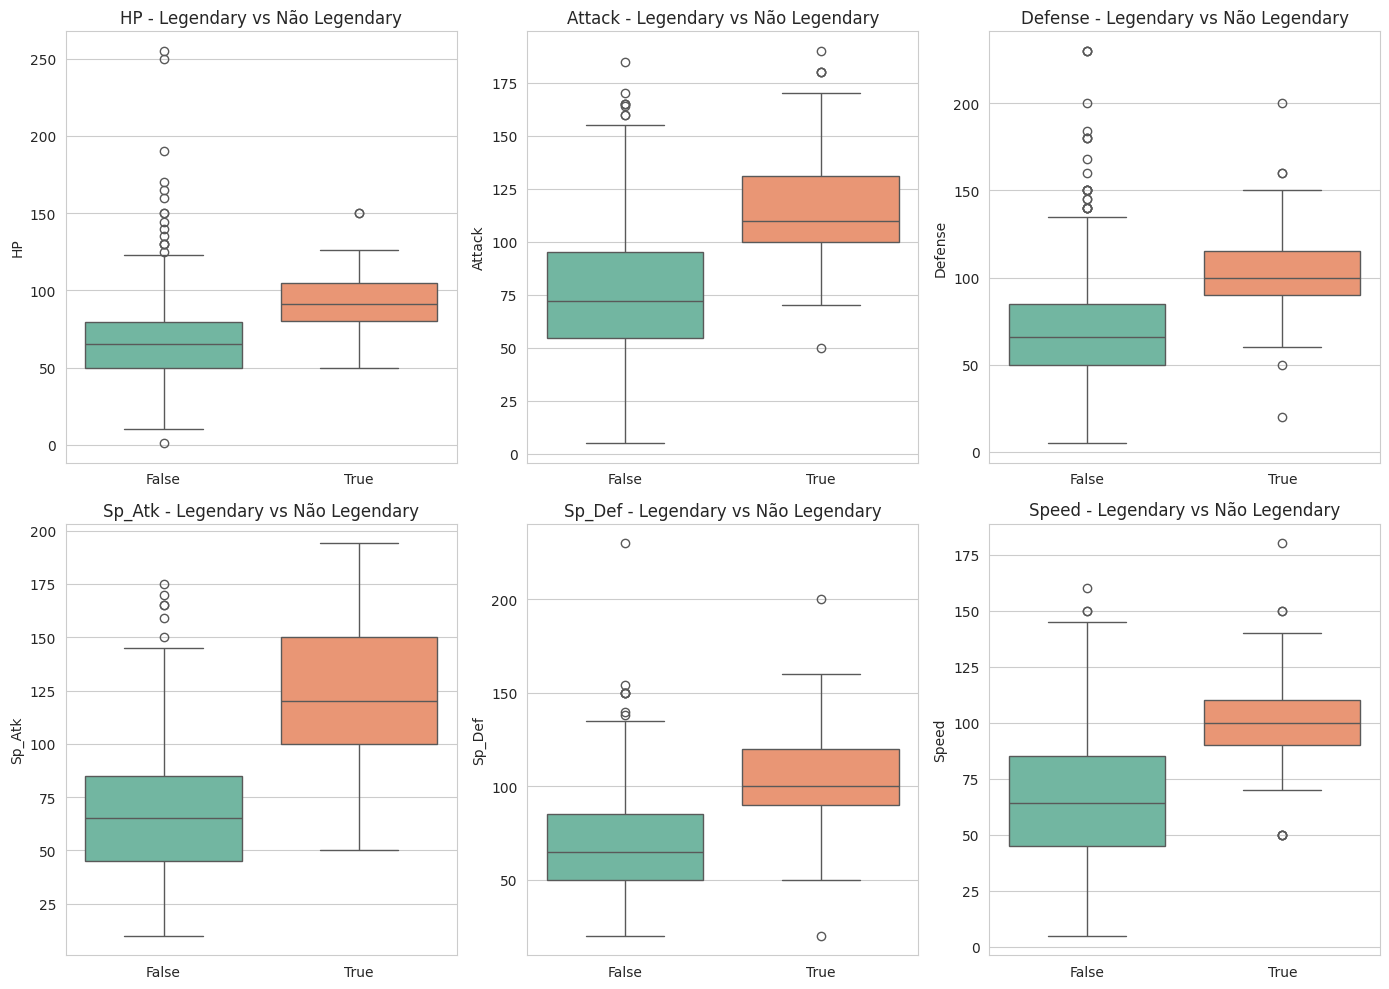

In [49]:
# Remover espaços indesejados dos nomes das colunas, se necessário
df_pokemon.columns = df_pokemon.columns.str.strip()

# Atributos de combate
stats_cols = ['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']

# 1. Comparar médias dos atributos por Legendary
mean_comparison = df_pokemon.groupby('Legendary')[stats_cols].mean()
print("Médias por grupo Legendary:")
print(mean_comparison)

# 2. Comparar medianas dos atributos por Legendary
median_comparison = df_pokemon.groupby('Legendary')[stats_cols].median()
print("\nMedianas por grupo Legendary:")
print(median_comparison)

# 3. Criar boxplots dos atributos de combate por Legendary
plt.figure(figsize=(14, 10))
for i, attr in enumerate(stats_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df_pokemon, x='Legendary', y=attr, palette='Set2')
    plt.title(f'{attr} - Legendary vs Não Legendary')
    plt.xlabel('')
plt.tight_layout()
plt.show()

### 7  **Gerações:**
* Calcule a média de `HP`, `Attack` e `Defense` para cada `Generation`. Há alguma tendência perceptível no "poder" médio dos Pokémon ao longo das gerações?
    Ao analisar as médias de HP, Attack e Defense ao longo das gerações, não há uma tendência linear ou crescente clara no "poder" médio dos Pokémon. A Geração 4 apresenta os maiores valores médios combinados, com destaque para Attack (82,87) e Defense (78,13), enquanto a Geração 2 mostra um HP médio mais alto (71,2) que a Geração 1. No entanto, essas variações não seguem um padrão de aumento contínuo. Isso sugere que o balanceamento das estatísticas nas novas gerações não tem o objetivo de tornar os Pokémon progressivamente mais poderosos, mas sim de manter uma diversidade estratégica e equilibrada entre diferentes estilos de combate.

* Qual geração introduziu o maior número de Pokémon?

    A Geração 1 foi a que introduziu o maior número de Pokémon, totalizando 166 espécies diferentes no dataset. 










In [50]:
# Calcular a média de HP, Attack e Defense por geração
generation_means = df_pokemon.groupby('Generation')[['HP', 'Attack', 'Defense']].mean()

# Exibir a tabela resultante
print("Médias por Geração (HP, Attack, Defense):")
print(generation_means)


Médias por Geração (HP, Attack, Defense):
                   HP     Attack    Defense
Generation                                 
1           65.819277  76.638554  70.861446
2           71.207547  72.028302  73.386792
3           66.543750  81.625000  74.100000
4           73.082645  82.867769  78.132231
5           71.787879  82.066667  72.327273
6           68.268293  75.804878  76.682927


In [51]:
# Contar quantos Pokémon existem em cada geração
generation_counts = df_pokemon['Generation'].value_counts().sort_values(ascending=False)

# Exibir a geração com mais Pokémon
print("\nQuantidade de Pokémon por geração:")
print(generation_counts)

# Geração com maior número
most_populous_gen = generation_counts.idxmax()
print(f"\nA geração que introduziu mais Pokémon foi a Geração {most_populous_gen}, com {generation_counts.max()} espécies.")



Quantidade de Pokémon por geração:
Generation
1    166
5    165
3    160
4    121
2    106
6     82
Name: count, dtype: int64

A geração que introduziu mais Pokémon foi a Geração 1, com 166 espécies.


### 8  **Amostragem:**
* Ao comparar as estatísticas da amostra com as da população total, quão próximas elas ficaram?
* Se você tirasse uma amostra muito pequena (ex: 5 Pokémon), você esperaria que as estatísticas da amostra fossem mais ou menos representativas da população total em comparação com a amostra de 50 Pokémon? Por quê?

In [48]:
# Selecionar os atributos de combate
stats_cols = ['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']

# Gerar uma amostra aleatória de 50 Pokémon
sample_50 = df_pokemon.sample(50, random_state=42)

# Calcular as médias da população e da amostra
sample_means = sample_50[stats_cols].mean()
population_means = df_pokemon[stats_cols].mean()

# Comparar os valores em um DataFrame
comparison_df = pd.DataFrame({
    'População': population_means,
    'Amostra (n=50)': sample_means,
    'Diferença Absoluta': (sample_means - population_means).abs()
})

# Exibir a tabela
print(comparison_df)

         População  Amostra (n=50)  Diferença Absoluta
HP        69.25875           63.12             6.13875
Attack    79.00125           69.76             9.24125
Defense   73.84250           77.50             3.65750
Sp_Atk    72.82000           71.70             1.12000
Sp_Def    71.90250           77.80             5.89750
Speed     68.27750           66.18             2.09750


### 9  **Exploração Livre (HP por Classes):**
* Analisando a tabela de frequência das classes de `HP` que criamos, qual classe de `HP` é a mais comum?

    A classe de HP mais comum entre os Pokémon é a categoria "Baixo", com 274 ocorrências. Isso indica que a maioria dos Pokémon possui pontos de vida relativamente reduzidos, entre 50 e 70 HP, reforçando que altos valores de HP são menos frequentes no universo Pokémon.

* Os Pokémon Lendários estão mais concentrados em classes de `HP` mais altas? (Dica: filtre o DataFrame para Lendários e depois veja a distribuição de `HP_Class`).

    Sim, os Pokémon Lendários estão **mais concentrados em classes de `HP` mais altas**. A maioria deles pertence às categorias **"Alto" (29)** e **"Médio" (20)**, com uma presença relevante também nas classes **"Muito Alto" (8)** e **"Extremo" (2)**.
    Por outro lado, **nenhum Pokémon Lendário** está na classe "Muito Baixo" e apenas **6** estão na classe "Baixo", reforçando que Lendários são projetados com **valores de HP superiores à média geral**.


In [52]:
# Garantir que os nomes das colunas estão limpos
df_pokemon.columns = df_pokemon.columns.str.strip()

# Definir os intervalos e rótulos para as classes de HP
bins = [0, 50, 70, 90, 110, 130, 255]
labels = ['Muito Baixo', 'Baixo', 'Médio', 'Alto', 'Muito Alto', 'Extremo']

# Criar coluna com a classe de HP
df_pokemon['HP_Class'] = pd.cut(df_pokemon['HP'], bins=bins, labels=labels, right=False)

# Contar frequência geral das classes de HP
hp_class_counts = df_pokemon['HP_Class'].value_counts().sort_index()

print("Frequência geral das classes de HP:")
print(hp_class_counts)

# Identificar a classe mais comum
most_common_class = hp_class_counts.idxmax()
print(f"\nClasse de HP mais comum: {most_common_class}")


Frequência geral das classes de HP:
HP_Class
Muito Baixo    148
Baixo          274
Médio          220
Alto           116
Muito Alto      26
Extremo         15
Name: count, dtype: int64

Classe de HP mais comum: Baixo


In [53]:
# Filtrar apenas os Pokémon lendários
legendary_pokemon = df_pokemon[df_pokemon['Legendary'] == True]

# Contar a distribuição de HP_Class entre os Lendários
legendary_hp_distribution = legendary_pokemon['HP_Class'].value_counts().sort_index()

print("\nDistribuição de HP_Class entre Pokémon Lendários:")
print(legendary_hp_distribution)



Distribuição de HP_Class entre Pokémon Lendários:
HP_Class
Muito Baixo     0
Baixo           6
Médio          20
Alto           29
Muito Alto      8
Extremo         2
Name: count, dtype: int64



### 10 **Conclusão Pessoal e Insight:**
* Qual foi a descoberta mais interessante ou surpreendente que você fez ao analisar este universo de Pokémon? Descreva-a e explique por que chamou sua atenção.

    Uma das descobertas mais interessantes ao analisar o universo Pokémon foi perceber que os **Pokémon Lendários não apenas possuem atributos médios muito mais altos**, como também são **mais consistentes e equilibrados em todos os aspectos de combate**. Ao contrário do que se poderia esperar — que eles se destacassem apenas em um ou dois atributos —, os dados mostram que eles têm **força uniforme** em HP, Attack, Defense, Speed e atributos especiais. Isso chamou minha atenção porque reforça a ideia de que os Lendários são desenhados para representar figuras de poder absoluto dentro do jogo, quase como “chefes” ou entidades míticas, enquanto os demais Pokémon apresentam muito mais **diversidade de perfis e especializações**. Essa diferenciação clara entre equilíbrio e variabilidade estratégica foi um dos pontos mais reveladores da análise.
